# Regularized Linear Regression Applied to the Gaming Data


In this notebook, we will build some linear regression models to predict housing prices from this data.  We will split our data into training, validation, and test sets, build various (regularized) models on the training/validation data and compare their results on the test set. We will examine metrics such as *r-squared* and *mean absolute error*.

**Notebook Contents**

> 1. Exploring the behavior of LASSO vs. Ridge regularization
> 2. Standard-scaling features (a must for regularization!)
> 3. Tuning regularization strength via validation
> 4. Automated regularization strength tuning via cross-validation


## Automated Regularization Strength Tuning via Cross-validation 

### Using LassoCV to find the best alpha via Cross-Validation

It will do the following for each candidate value of alpha:

> 1. Run cross-validation and score the result
> 2. Find the value of alpha that gave the best CV score
> 3. Fit a final model on all the data using the best value of alpha it just found

Then you can use the `predict` method of the model just as with all of our previous models

In [21]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, LassoCV, Ridge, RidgeCV
from sklearn.metrics import r2_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import f_regression
import pandas as pd
import numpy as np
import seaborn as sns
sns.set()

In [22]:
datafile = "game_data_final_features4.csv"
df=pd.read_csv(datafile)

In [23]:
df['log_rating_count'] = np.log(df['rating_count'])

In [24]:
df['log_downloads'] = np.log(df['downloads'])

In [25]:
X = df.loc[:,['Free_Pay','contains_ads', 'has_iap', 'android','log_downloads',
       'overall_rating','log_rating_count', 'one_star', 'two_star', 'three_star', 'four_star', 'five_star',
       'categories_Action', 'categories_Adventure',
       'categories_Arcade', 'categories_Board', 'categories_Card',
       'categories_Casino', 'categories_Casual', 'categories_Other',
       'categories_Puzzle', 'categories_Role Playing', 'categories_Simulation',
       'categories_Sports', 'categories_Strategy']]
 
y = df['log_revenue']

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=32)

In [27]:
## Scale the data
std = StandardScaler()
std.fit(X_train.values)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [28]:
## Scale the Predictors on both the train and test set
X_tr = std.transform(X_train.values)
X_te = std.transform(X_test.values)

In [29]:
# Run the cross validation, find the best alpha, refit the model on all the data with that alpha

alphavec = 10**np.linspace(-2,2,200)

lasso_model = LassoCV(alphas = alphavec, cv=5)
lasso_model.fit(X_tr, y_train)

LassoCV(alphas=array([1.00000000e-02, 1.04737090e-02, 1.09698580e-02, 1.14895100e-02,
       1.20337784e-02, 1.26038293e-02, 1.32008840e-02, 1.38262217e-02,
       1.44811823e-02, 1.51671689e-02, 1.58856513e-02, 1.66381689e-02,
       1.74263339e-02, 1.82518349e-02, 1.91164408e-02, 2.00220037e-02,
       2.09704640e-02, 2.19638537e-02, 2.30043012e-02, 2.40940356e-02,
       2.52353917e-02, 2.64308149e-0...
       6.01027678e+01, 6.29498899e+01, 6.59318827e+01, 6.90551352e+01,
       7.23263390e+01, 7.57525026e+01, 7.93409667e+01, 8.30994195e+01,
       8.70359136e+01, 9.11588830e+01, 9.54771611e+01, 1.00000000e+02]),
        copy_X=True, cv=5, eps=0.001, fit_intercept=True, max_iter=1000,
        n_alphas=100, n_jobs=None, normalize=False, positive=False,
        precompute='auto', random_state=None, selection='cyclic', tol=0.0001,
        verbose=False)

In [30]:
# This is the best alpha value it found - not far from the value
# selected using simple validation
alpha_lasso = lasso_model.alpha_

In [31]:
# Make predictions on the test set using the new model
test_set_pred = lasso_model.predict(X_te)

In [32]:
# Find the MAE and R^2 on the test set using this model
mae(y_test, test_set_pred)

1.2125390440330894

In [33]:
r2_score(y_test, test_set_pred)

0.5332940658901418

### Using RidgeCV to find the best alpha via Cross-Validation

It will do the following for each candidate value of alpha:

> 1. Run cross-validation and score the result
> 2. Find the value of alpha that gave the best CV score
> 3. Fit a final model on all the data using the best value of alpha it just found

Then you can use the `predict` method of the model just as with all of our previous models

In [34]:
## Scale the data
std = StandardScaler()
std.fit(X_train.values)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [35]:
## Scale the Predictors on both the train and test set
X_tr = std.transform(X_train.values)
X_te = std.transform(X_test.values)

In [36]:
# Run the cross validation, find the best alpha, refit the model on all the data with that alpha

alphavec = 10**np.linspace(-2,2,200)

ridge_model = RidgeCV(alphas = alphavec, cv=5)
ridge_model.fit(X_tr, y_train)

RidgeCV(alphas=array([1.00000000e-02, 1.04737090e-02, 1.09698580e-02, 1.14895100e-02,
       1.20337784e-02, 1.26038293e-02, 1.32008840e-02, 1.38262217e-02,
       1.44811823e-02, 1.51671689e-02, 1.58856513e-02, 1.66381689e-02,
       1.74263339e-02, 1.82518349e-02, 1.91164408e-02, 2.00220037e-02,
       2.09704640e-02, 2.19638537e-02, 2.30043012e-02, 2.40940356e-02,
       2.52353917e-02, 2.64308149e-0...
       4.15040476e+01, 4.34701316e+01, 4.55293507e+01, 4.76861170e+01,
       4.99450512e+01, 5.23109931e+01, 5.47890118e+01, 5.73844165e+01,
       6.01027678e+01, 6.29498899e+01, 6.59318827e+01, 6.90551352e+01,
       7.23263390e+01, 7.57525026e+01, 7.93409667e+01, 8.30994195e+01,
       8.70359136e+01, 9.11588830e+01, 9.54771611e+01, 1.00000000e+02]),
        cv=5, fit_intercept=True, gcv_mode=None, normalize=False, scoring=None,
        store_cv_values=False)

In [38]:
# This is the best alpha value it found - not far from the value
# selected using simple validation
alpha_ridge = ridge_model.alpha_

In [39]:
# Make predictions on the test set using the new model
test_set_pred = ridge_model.predict(X_te)

In [40]:
# Find the MAE and R^2 on the test set using this model
#Mean Absolute Error (MAE)
def mae(y_true, y_pred):
    return np.mean(np.abs(y_pred - y_true))
mae(y_test, test_set_pred)

1.2056184833615688

In [41]:
r2_score(y_test, test_set_pred)

0.5248747973277765

## KFold cross validation with regularization to finalize the model and R2

In [42]:
lm = LinearRegression()
lm_reg = Ridge(alpha=alpha_ridge)
lm_las = Lasso(alpha=alpha_lasso)

In [43]:
std = StandardScaler()
std.fit(X_train.values)
X_tr = std.transform(X_train.values)
X_te = std.transform(X_test.values)

In [44]:
kf = KFold(n_splits=5, shuffle=True)

print(np.mean(cross_val_score(lm, X_train, y_train, cv=kf, scoring='r2')))
print(np.mean(cross_val_score(lm_las, X_tr, y_train, cv=kf, scoring='r2')))
print(np.mean(cross_val_score(lm_reg, X_tr, y_train, cv=kf, scoring='r2')))

0.5284001299162185
0.520732613810144
0.5238514451478341


Exercise: Using the KFold objects and the cross_val_score method above, loop through 5 different random states of your choice and collect mean CV scores for both lm and lm_reg. Compare the 5 pairs of scores.

Are you convinced yet that regularization is helpful with this feature set?



In [45]:
from statistics import mean 
def randomKFold(kfold):
    lm_score = []
    las_score = []
    reg_score = []
    for k in kfold:
        kf = KFold(n_splits=5, shuffle=True, random_state=k)
        lm_score.append(np.mean(cross_val_score(lm, X_train, y_train, cv=kf, scoring='r2')))
        las_score.append(np.mean(cross_val_score(lm_las, X_tr, y_train, cv=kf, scoring='r2')))
        reg_score.append(np.mean(cross_val_score(lm_reg, X_tr, y_train, cv=kf, scoring='r2')))
    print ("Linear Score", mean(lm_score))
    print ("Lasso Score", mean(las_score))
    print ("Ridge Score", mean(reg_score))

In [46]:
# let's do this 20 times
randomKFold(range(10,30))

Linear Score 0.5246680194346983
Lasso Score 0.5205112614411493
Ridge Score 0.5269399756894492


**Best Fit Ridge**

In [47]:
# output coeff for each features
pd.DataFrame(data={'Coef':ridge_model.coef_}, index=X_train.columns)

,Coef
Free_Pay,-0.899329
contains_ads,-0.421503
has_iap,0.302078
android,-0.138313
log_downloads,-0.383902
overall_rating,-0.053786
log_rating_count,0.869309
one_star,0.764338
two_star,0.059152
three_star,-2.488385


In [48]:
test_set_pred = ridge_model.predict(X_te)

In [49]:
#Mean Absolute Error (MAE)
mae(y_test, test_set_pred)

1.2056184833615688

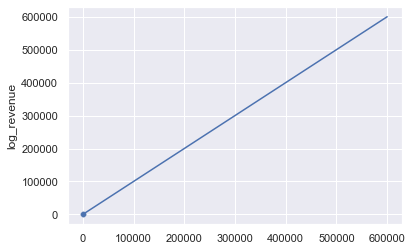

In [54]:
sns.scatterplot(test_set_pred, y_test, alpha=.1)
sns.lineplot(np.linspace(0,600000,1000), np.linspace(0,600000,1000))

In [51]:
#r-squared
r2_score(y_test, test_set_pred)

0.5248747973277765